# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1 - Credit Card - Clustering

### 1 - Importing dataset and pre-processing
    - Source: kaggle.com/arjunbhasin2013/ccdata

In [309]:
df_card = pd.read_csv('CC_DATASET.csv')
df_card

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [310]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [311]:
# Checking the Null Values
df_card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### 2 - Outliers treatment 

    In the begining of the exercise request, it was said that the dataset had only few outliers. So, before continue, I'm gonna remove them using the mean of each column of only 0.1% of the data.

In [312]:
# Creating the loop for the outliers

for i in df_card.drop(['CUST_ID'], axis=1):
    df_card[i] = np.where(df_card[i] <= df_card[i].quantile(0.001), 
                       df_card[(df_card[i] > df_card[i].quantile(0.001)) & (df_card[i] < df_card[i].quantile(0.999))][i].mean(),
                               df_card[i])
    
    df_card[i] = np.where(df_card[i] >= df_card[i].quantile(0.999), 
                       df_card[(df_card[i] > df_card[i].quantile(0.001)) & (df_card[i] < df_card[i].quantile(0.999))][i].mean(),
                               df_card[i])

In [315]:
# Checking after the treatment

df_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1563.554257,0.626143,1258.408323,1083.699434,706.615103,1974.559085,0.477847,0.321315,0.523690,0.274047,6.533884,18.688979,4478.724331,1741.736625,816.036015,0.347673,9.655389
std,2021.965087,0.136737,1758.281574,1231.023117,701.672987,1636.225026,0.207483,0.169723,0.172158,0.135156,5.106912,21.657344,3578.341006,2612.557023,1766.330435,0.142308,0.547848
min,0.000199,0.090909,0.010000,0.010000,1.950000,14.222216,0.083333,0.083333,0.083333,0.083333,1.000000,1.000000,300.000000,0.049513,1.334075,0.083333,7.000000
25%,138.552580,0.630180,327.477500,500.000000,345.252500,1259.274342,0.416667,0.250000,0.521251,0.250000,4.000000,6.000000,1600.000000,424.654408,169.473399,0.346911,9.712983
50%,908.814551,0.630180,1009.000000,1083.698336,706.614394,1974.557102,0.500000,0.319414,0.521251,0.273956,6.533272,15.000000,3000.000000,934.053859,313.807299,0.346911,9.712983
75%,2043.487539,0.630180,1258.407048,1083.698336,706.614394,1974.557102,0.510131,0.319414,0.537649,0.273956,6.533272,18.687545,6500.000000,1897.187663,817.362420,0.346911,9.712983
max,14581.459140,0.909091,27790.420000,22257.390000,12128.940000,20277.331120,0.916667,0.916667,0.916667,0.916667,63.000000,248.000000,21500.000000,33486.310440,29019.802880,0.916667,11.000000


### 3 - Missing Values Treatment
    In the begining of the exercise, it was request to fill all the null values with zero.

In [317]:
# Filling the null values with zero

df_card.fillna(value=0, inplace=True)

In [318]:
df_card.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### 4 - Data standardization
    As the last step of pre-processing, let's use the Standard Scaler for standardization.


In [319]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [320]:
# Fitting the Scaler
scaler.fit(df_card.drop(['CUST_ID'], axis=1))

StandardScaler()

In [321]:
# Applying the Scaler to a new df

array_card_scaled = scaler.transform(df_card.drop(['CUST_ID'], axis=1))

In [322]:
# Create a df with the array from scaler

df_card_scaled = pd.DataFrame(array_card_scaled, columns = df_card.drop(['CUST_ID'], axis=1).columns)
df_card_scaled.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.753098,1.404516,-6.614830e-01,-8.920205e-07,-0.871131,-0.000001,-1.499869,-0.011206,-2.558003,-0.000672,-0.000120,-0.770635,-0.972045,-5.894687e-01,-0.372079,-0.005354,0.105134
1,0.810600,2.069397,-7.250268e-07,-8.920205e-07,-0.000001,2.731064,-0.050046,-0.011206,-0.014166,-0.177932,-0.496195,-0.000066,0.704750,9.038761e-01,0.163559,-0.881595,0.105134
2,0.460763,0.029525,-2.759885e-01,-2.522672e-01,-0.000001,-0.000001,0.155607,0.197310,-0.014166,-0.000672,-0.000120,-0.308872,0.844483,-4.285964e-01,-0.091995,-0.005354,0.105134
3,0.051001,0.074753,1.368411e-01,3.373810e-01,-0.000001,-1.081068,-1.901534,-1.402257,-0.014166,-1.411148,-1.083667,-0.816811,0.844483,-6.738633e-07,-0.452186,-0.005354,0.105134
4,-0.368889,0.029525,-7.066432e-01,-8.673753e-01,-0.000001,-0.000001,-1.901534,-1.402257,-0.014166,-0.000672,-0.000120,-0.816811,-0.916152,-4.070576e-01,-0.311626,-0.005354,0.105134
5,0.121806,0.029525,4.258468e-02,-8.920205e-07,0.893151,-0.000001,0.910100,-0.011206,0.346464,-0.000672,-0.000120,-0.493577,-0.748472,-1.307906e-01,0.930070,-0.005354,0.105134
6,-0.463087,0.029525,3.317402e+00,4.320981e+00,-0.025989,-0.000001,0.155607,0.197310,0.081089,-0.000672,-0.000120,2.092295,2.521279,1.765640e+00,-0.338456,0.092838,0.105134
7,0.128644,0.029525,-4.676465e-01,-8.920205e-07,-0.385408,-0.000001,0.155607,-0.011206,0.081089,-0.000672,-0.000120,-0.308872,-0.608739,-4.067781e-01,-0.146689,-0.005354,0.105134
8,-0.271349,0.029525,-2.257548e-01,-3.429936e-01,-0.722051,-0.000001,-0.696549,-1.402257,-1.589846,-0.000672,-0.000120,-0.632106,0.704750,-4.032513e-01,-0.273055,-0.005354,0.105134
9,-0.698037,-0.590129,1.319070e-02,1.607700e-01,-0.000001,-0.000001,-1.499869,-0.911231,-0.014166,-0.000672,-0.000120,-0.724459,1.822614,-2.208558e-01,-0.394592,-0.005354,0.105134


## Model - Clustering with K-Means

In [323]:
# Importing K-Means from SKLearn

from sklearn.cluster import KMeans

In [324]:
# Defining this first clustering for two clusters
k2 = 2 
model_km2 = KMeans(n_clusters = k2)

In [325]:
# Fitting the model with the DF
model_km2.fit(df_card_scaled)

KMeans(n_clusters=2)

In [327]:
# Adding a "Cluster" column to the DF

df_card['Cluster 1'] = pd.DataFrame(model_km2.labels_).values

In [328]:
df_card.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster 1
0,C10001,40.900749,0.818182,95.400000,1083.698336,95.400000,1974.557102,0.166667,0.319414,0.083333,0.273956,6.533272,2.000000,1000.0,201.802084,139.509787,0.346911,9.712983,1
1,C10002,3202.467416,0.909091,1258.407048,1083.698336,706.614394,6442.945483,0.467464,0.319414,0.521251,0.250000,4.000000,18.687545,7000.0,4103.032597,1072.340217,0.222222,9.712983,0
2,C10003,2495.148862,0.630180,773.170000,773.170000,706.614394,1974.557102,0.510131,0.354802,0.521251,0.273956,6.533272,12.000000,7500.0,622.066742,627.284787,0.346911,9.712983,1
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,706.614394,205.788017,0.083333,0.083333,0.521251,0.083333,1.000000,1.000000,7500.0,1741.734864,0.000000,0.346911,9.712983,1
4,C10005,817.714335,0.630180,16.000000,16.000000,706.614394,1974.557102,0.083333,0.083333,0.521251,0.273956,6.533272,1.000000,1200.0,678.334763,244.791237,0.346911,9.712983,1
5,C10006,1809.828751,0.630180,1333.280000,1083.698336,1333.280000,1974.557102,0.666667,0.319414,0.583333,0.273956,6.533272,8.000000,1800.0,1400.057770,2407.246035,0.346911,9.712983,1
6,C10007,627.260806,0.630180,7091.010000,6402.630000,688.380000,1974.557102,0.510131,0.354802,0.537649,0.273956,6.533272,64.000000,13500.0,6354.314328,198.065894,0.360884,9.712983,0
7,C10008,1823.652743,0.630180,436.200000,1083.698336,436.200000,1974.557102,0.510131,0.319414,0.537649,0.273956,6.533272,12.000000,2300.0,679.065082,532.033990,0.346911,9.712983,1
8,C10009,1014.926473,0.630180,861.490000,661.490000,200.000000,1974.557102,0.333333,0.083333,0.250000,0.273956,6.533272,5.000000,7000.0,688.278568,311.963409,0.346911,9.712983,1
9,C10010,152.225975,0.545455,1281.600000,1281.600000,706.614394,1974.557102,0.166667,0.166667,0.521251,0.273956,6.533272,3.000000,11000.0,1164.770591,100.302262,0.346911,9.712983,1


<AxesSubplot:>

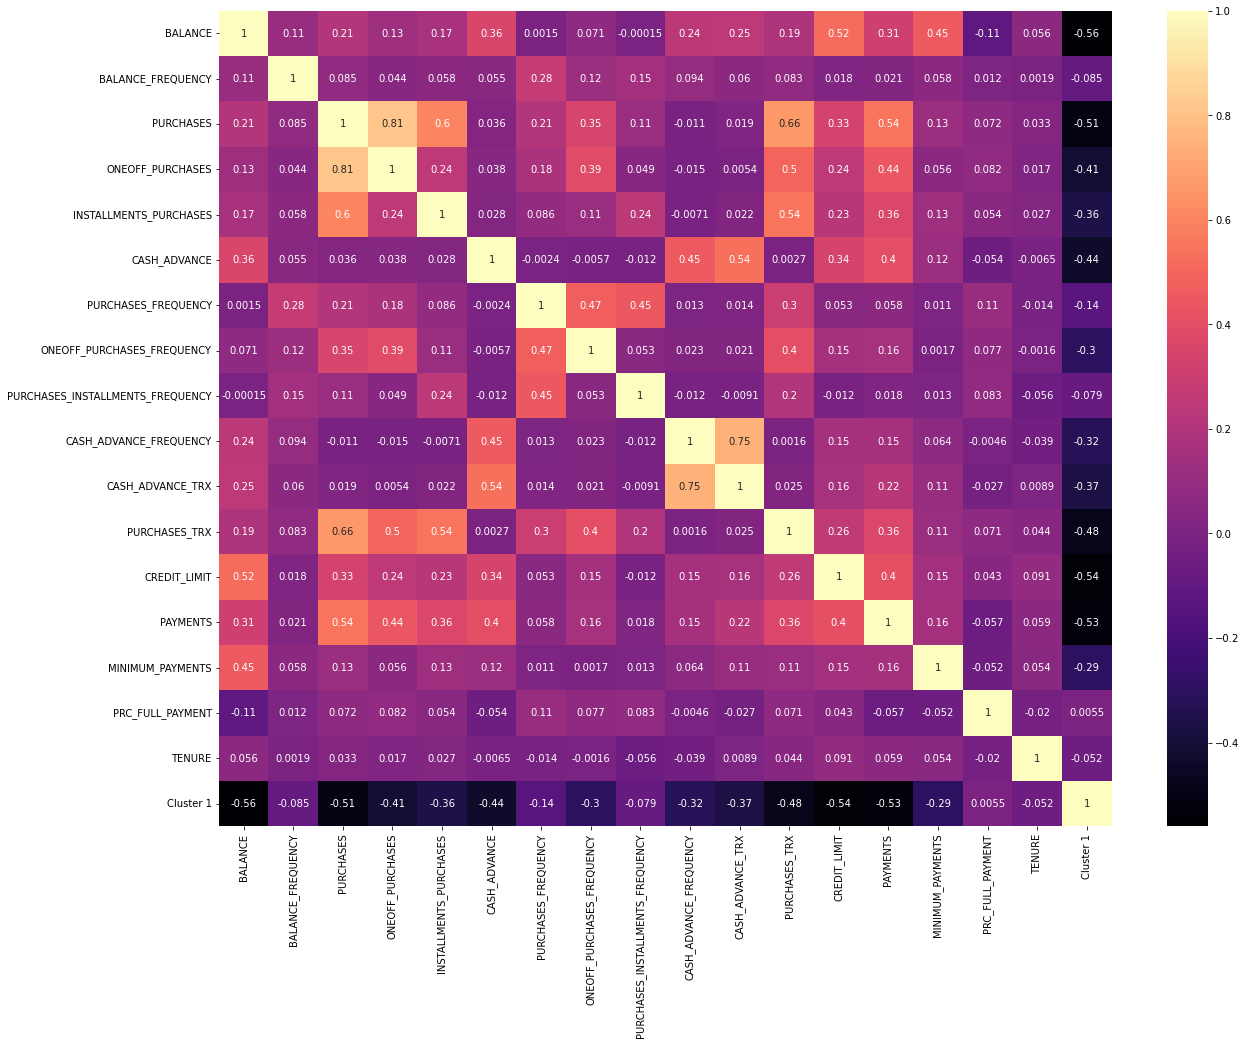

In [329]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_card.corr(), cmap='magma', annot=True)

<Figure size 1440x1080 with 0 Axes>

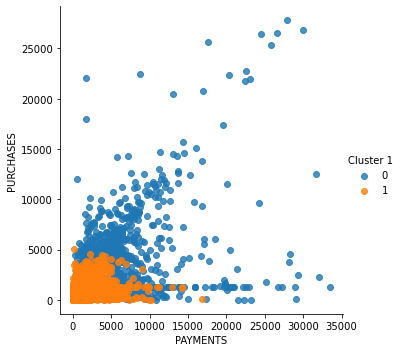

In [339]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='PAYMENTS', y='PURCHASES', data=df_card, hue='Cluster 1', fit_reg=False)

#### Now, let's try clustering with 3 clusters

In [331]:
k3 = 3

model_km3 = KMeans(n_clusters=k3)

In [332]:
# Fitting the model to the data
model_km3.fit(df_card_scaled)

KMeans(n_clusters=3)

In [333]:
df_card['Cluster 2'] = pd.DataFrame(model_km3.labels_).values

In [334]:
df_card.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster 1,Cluster 2
0,C10001,40.900749,0.818182,95.400000,1083.698336,95.400000,1974.557102,0.166667,0.319414,0.083333,0.273956,6.533272,2.000000,1000.0,201.802084,139.509787,0.346911,9.712983,1,2
1,C10002,3202.467416,0.909091,1258.407048,1083.698336,706.614394,6442.945483,0.467464,0.319414,0.521251,0.250000,4.000000,18.687545,7000.0,4103.032597,1072.340217,0.222222,9.712983,0,1
2,C10003,2495.148862,0.630180,773.170000,773.170000,706.614394,1974.557102,0.510131,0.354802,0.521251,0.273956,6.533272,12.000000,7500.0,622.066742,627.284787,0.346911,9.712983,1,2
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,706.614394,205.788017,0.083333,0.083333,0.521251,0.083333,1.000000,1.000000,7500.0,1741.734864,0.000000,0.346911,9.712983,1,2
4,C10005,817.714335,0.630180,16.000000,16.000000,706.614394,1974.557102,0.083333,0.083333,0.521251,0.273956,6.533272,1.000000,1200.0,678.334763,244.791237,0.346911,9.712983,1,2
5,C10006,1809.828751,0.630180,1333.280000,1083.698336,1333.280000,1974.557102,0.666667,0.319414,0.583333,0.273956,6.533272,8.000000,1800.0,1400.057770,2407.246035,0.346911,9.712983,1,2
6,C10007,627.260806,0.630180,7091.010000,6402.630000,688.380000,1974.557102,0.510131,0.354802,0.537649,0.273956,6.533272,64.000000,13500.0,6354.314328,198.065894,0.360884,9.712983,0,0
7,C10008,1823.652743,0.630180,436.200000,1083.698336,436.200000,1974.557102,0.510131,0.319414,0.537649,0.273956,6.533272,12.000000,2300.0,679.065082,532.033990,0.346911,9.712983,1,2
8,C10009,1014.926473,0.630180,861.490000,661.490000,200.000000,1974.557102,0.333333,0.083333,0.250000,0.273956,6.533272,5.000000,7000.0,688.278568,311.963409,0.346911,9.712983,1,2
9,C10010,152.225975,0.545455,1281.600000,1281.600000,706.614394,1974.557102,0.166667,0.166667,0.521251,0.273956,6.533272,3.000000,11000.0,1164.770591,100.302262,0.346911,9.712983,1,2


<AxesSubplot:>

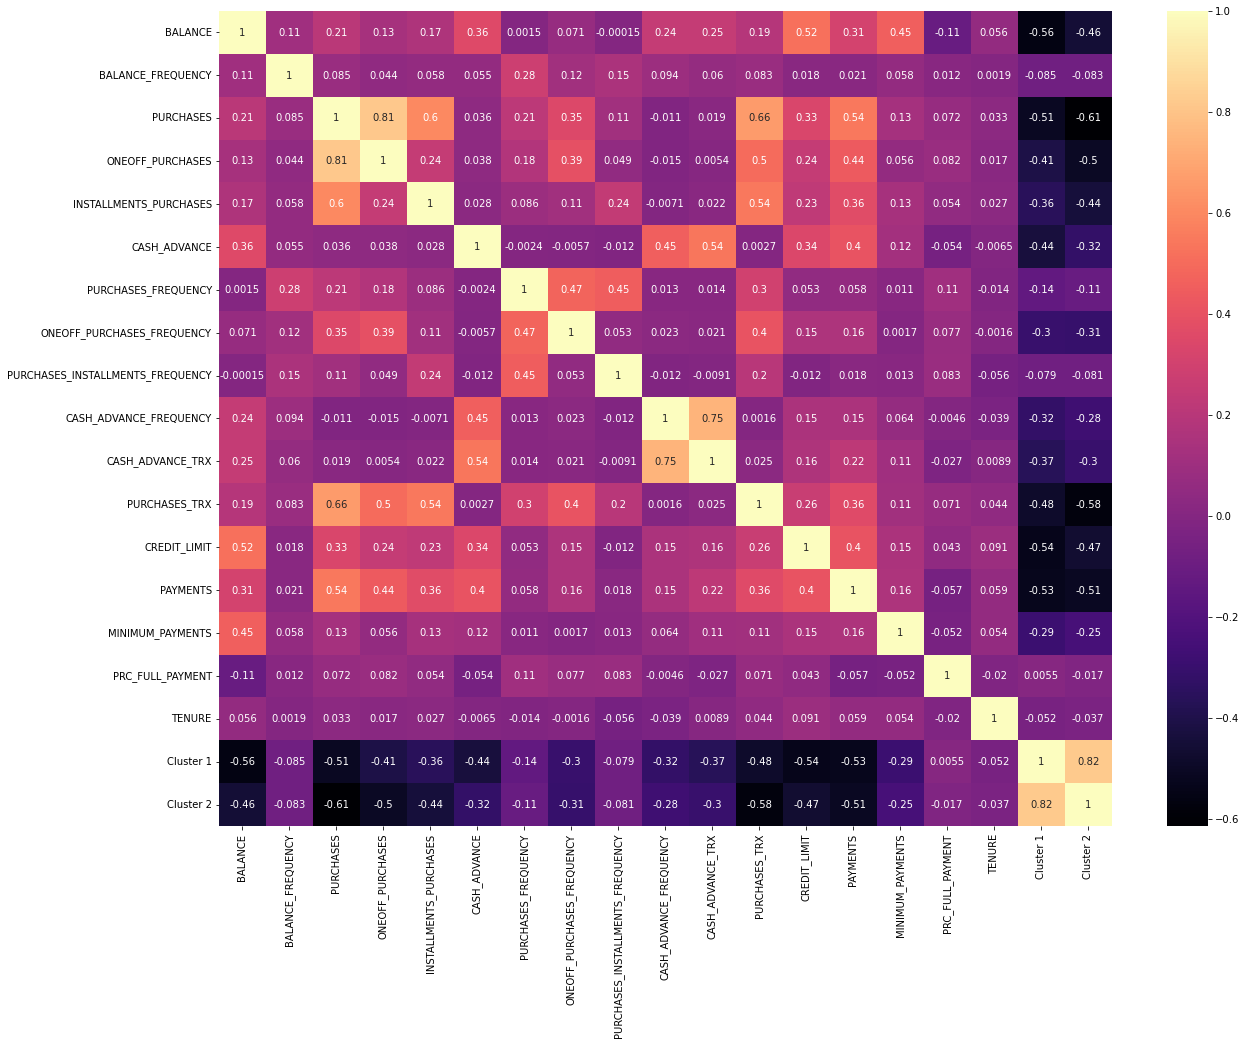

In [335]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_card.corr(), cmap='magma', annot=True)

<Figure size 1440x1080 with 0 Axes>

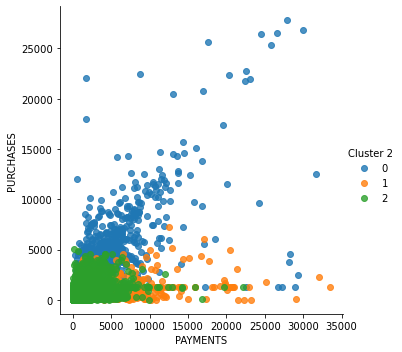

In [338]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='PAYMENTS', y='PURCHASES', data=df_card, hue='Cluster 2', fit_reg=False)

### How many cases for each cluster on both clustering?

In [343]:
print(f"No primeiro clustering com 2 clusters, a divisão ficou em {(df_card[df_card['Cluster 1'] == 0]['Cluster 1'].count()) / (df_card['Cluster 1'].count().sum()) * 100:.2f}% ({df_card[df_card['Cluster 1'] == 0]['Cluster 1'].count()} values) para 0 e {(df_card[df_card['Cluster 1'] == 1]['Cluster 1'].count()) / (df_card['Cluster 1'].count().sum()) * 100:.2f}% ({df_card[df_card['Cluster 1'] == 1]['Cluster 1'].count()} values) para 1.")
print(f"No segundo clustering com 3 clusters, a divisão ficou em {(df_card[df_card['Cluster 2'] == 0]['Cluster 2'].count()) / (df_card['Cluster 2'].count().sum()) * 100:.2f}% ({df_card[df_card['Cluster 2'] == 0]['Cluster 2'].count()} values) para 0, {(df_card[df_card['Cluster 2'] == 1]['Cluster 2'].count()) / (df_card['Cluster 2'].count().sum()) * 100:.2f}% ({df_card[df_card['Cluster 2'] == 1]['Cluster 2'].count()} values) para 1, \ne {(df_card[df_card['Cluster 2'] == 2]['Cluster 2'].count()) / (df_card['Cluster 2'].count().sum()) * 100:.2f}% ({df_card[df_card['Cluster 2'] == 2]['Cluster 2'].count()} values) para 2.")

No primeiro clustering com 2 clusters, a divisão ficou em 17.61% (1576 values) para 0 e 82.39% (7374 values) para 1.
No segundo clustering com 3 clusters, a divisão ficou em 7.01% (627 values) para 0, 11.13% (996 values) para 1, 
e 81.87% (7327 values) para 2.


In [344]:
print(df_card.groupby('Cluster 1')['CUST_ID'].count())
print(df_card.groupby('Cluster 2')['CUST_ID'].count())

Cluster 1
0    1576
1    7374
Name: CUST_ID, dtype: int64
Cluster 2
0     627
1     996
2    7327
Name: CUST_ID, dtype: int64


### What is the mean and median for purchases by each cluster?

In [350]:
#Clustering 1 - k=2  - MEAN

print('MEAN')
df_card.groupby('Cluster 1')[['PURCHASES']].mean().sort_values(by='PURCHASES', ascending=False)

MEAN


,PURCHASES
Cluster 1,
0,3191.796369
1,845.197099


In [351]:
#Clustering 1 - k=2  - MEDIAN
print('MEDIAN')
df_card.groupby('Cluster 1')[['PURCHASES']].median().sort_values(by='PURCHASES', ascending=False)

MEDIAN


,PURCHASES
Cluster 1,
0,2127.630
1,743.735


In [352]:
#Clustering 1 - k=3

print('MEAN')
df_card.groupby('Cluster 2')[['PURCHASES']].mean().sort_values(by='PURCHASES', ascending=False)

MEAN


,PURCHASES
Cluster 2,
0,5799.614482
1,1106.338734
2,890.471247


In [353]:
#Clustering 1 - k=3

print('MEDIAN')
df_card.groupby('Cluster 2')[['PURCHASES']].median().sort_values(by='PURCHASES', ascending=False)

MEDIAN


,PURCHASES
Cluster 2,
0,4689.030000
1,1258.407048
2,789.960000


### What is the median of Credit Limit for each cluster of second clustering (k=3)?

In [354]:
#Clustering 1 - k=3
print('MEDIAN')
df_card.groupby('Cluster 2')[['CREDIT_LIMIT']].median().sort_values(by='CREDIT_LIMIT', ascending=False)

MEDIAN


,CREDIT_LIMIT
Cluster 2,
0,7500.0
1,7500.0
2,2850.0


# Exercise 2 - Cancer Diagnostic

### 1 - Importing the dataset

In [355]:
df_cancer = pd.read_csv('DIAG_CANCER.csv')
df_cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


### 2 - Checking Outlier on the "radius_mean" column and using the median to replace them.

In [356]:
df_cancer['radius_mean'].sort_values(ascending=False).head(20)

316    100003.00
315    100002.00
314    100001.00
313    100000.00
212        28.11
461        27.42
180        27.22
352        25.73
82         25.22
521        24.63
122        24.25
339        23.51
202        23.29
164        23.27
236        23.21
503        23.09
108        22.27
369        22.01
272        21.75
368        21.71
Name: radius_mean, dtype: float64

In [358]:
# Applying the median to the radius_mean column
df_cancer['radius_mean'] = np.where(df_cancer['radius_mean'] > 29, df_cancer['radius_mean'].median(), df_cancer['radius_mean'])

In [359]:
df_cancer['radius_mean'].sort_values(ascending=False).head(20)

212    28.11
461    27.42
180    27.22
352    25.73
82     25.22
521    24.63
122    24.25
339    23.51
202    23.29
164    23.27
236    23.21
503    23.09
108    22.27
369    22.01
272    21.75
368    21.71
393    21.61
564    21.56
372    21.37
23     21.16
Name: radius_mean, dtype: float64

### 3 - Treating Missing Values

In [360]:
#Checking the null values
df_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [361]:
df_cancer.shape

(569, 33)

In [362]:
# The column "Unnamed: 32" only has missing values, so we are gonna delete the column.

df_cancer.drop(['Unnamed: 32'], axis=1, inplace=True)


In [363]:
df_cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### 4 - Data standardization
Now, let's use the Standard Scaler for standardization.

In [364]:
scaler_cancer = StandardScaler()

In [365]:
# Fitting the scaler
scaler_cancer.fit(df_cancer.drop(['id', 'diagnosis'], axis=1))

StandardScaler()

In [366]:
# Applying the scaler to the df
array_cancer_scaled = scaler_cancer.transform(df_cancer.drop(['id', 'diagnosis'], axis=1))

In [367]:
#Create a df with the scaled features

df_cancer_scaled = pd.DataFrame(array_cancer_scaled, columns = df_cancer.drop(['id', 'diagnosis'], axis=1).columns)
df_cancer_scaled.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.095878,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.830823,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.580144,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.775668,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.751062,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.482260,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.169942,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.123333,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.325585,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.479411,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


### 5 - Now, let's apply the PCA for dimensionality reduction


In [368]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)

In [369]:
# Fitting the DF scaled with PCA
pca.fit(df_cancer_scaled)

PCA(n_components=5)

In [370]:
# Applying the data

X_pca = pca.transform(df_cancer_scaled)

In [371]:
# Results

pca.components_

array([[ 0.21824447,  0.10370828,  0.22753178,  0.22100188,  0.14267441,
         0.23933164,  0.25844128,  0.26087912,  0.13828467,  0.06446956,
         0.20603367,  0.01752968,  0.21138233,  0.20291462,  0.01473101,
         0.17043427,  0.1536068 ,  0.18339713,  0.0427472 ,  0.10265991,
         0.22798912,  0.10442926,  0.2366374 ,  0.22488125,  0.12798864,
         0.21011418,  0.22878001,  0.25087694,  0.12297764,  0.131821  ],
       [-0.2334654 , -0.05971722, -0.21535708, -0.23130654,  0.18600071,
         0.15186577,  0.06007455, -0.03489708,  0.19013666,  0.36656471,
        -0.10587992,  0.08969271, -0.08977374, -0.15261435,  0.20397511,
         0.23274643,  0.19728101,  0.13040983,  0.18323104,  0.28002465,
        -0.22003302, -0.04538532, -0.20004344, -0.21957433,  0.17235362,
         0.14369008,  0.09803328, -0.008231  ,  0.14180781,  0.27549419],
       [-0.00603381,  0.06421141, -0.0097247 ,  0.02825648, -0.10417331,
        -0.07406055,  0.00262731, -0.02579492, -0

In [372]:
# Creating a DF with the array from PCA

df_cancer_pca = pd.DataFrame(data = X_pca, columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5'])

In [373]:
df_cancer_pca.head(10)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,9.194007,1.944032,-1.124393,3.634522,-1.185467
1,2.386247,-3.768845,-0.530505,1.118135,0.623374
2,5.733461,-1.077277,-0.552992,0.912355,-0.174765
3,7.125819,10.273728,-3.227468,0.159150,-2.965225
4,3.934759,-1.950715,1.390038,2.939682,0.548906
5,2.380273,3.951557,-2.932903,0.943196,-1.055444
6,2.237333,-2.689577,-1.641920,0.149516,0.042765
7,2.143103,2.340805,-0.871293,-0.125810,-1.428164
8,3.174840,3.393219,-3.119412,-0.598742,-1.522533
9,6.352313,7.730386,-4.338830,-3.374567,1.706107


In [374]:
# Including the 'diagnosis' column to the PCA DF
df_cancer_pca['diagnosis'] = df_cancer['diagnosis']

In [375]:
df_cancer_pca.head(10)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,diagnosis
0,9.194007,1.944032,-1.124393,3.634522,-1.185467,M
1,2.386247,-3.768845,-0.530505,1.118135,0.623374,M
2,5.733461,-1.077277,-0.552992,0.912355,-0.174765,M
3,7.125819,10.273728,-3.227468,0.159150,-2.965225,M
4,3.934759,-1.950715,1.390038,2.939682,0.548906,M
5,2.380273,3.951557,-2.932903,0.943196,-1.055444,M
6,2.237333,-2.689577,-1.641920,0.149516,0.042765,M
7,2.143103,2.340805,-0.871293,-0.125810,-1.428164,M
8,3.174840,3.393219,-3.119412,-0.598742,-1.522533,M
9,6.352313,7.730386,-4.338830,-3.374567,1.706107,M


## Creating an model to test the Original data

In [384]:
# Importing the model library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [385]:
# Creating X and y variables
X = df_cancer.drop(['diagnosis', 'id'], axis=1).values
y = df_cancer['diagnosis'].values

In [386]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [387]:
# Creating the model
model_rf = RandomForestClassifier()

In [388]:
# Fitting and predicting the data
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

In [392]:
# Checking the accuracy and Confusion Matrix

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


print(classification_report(y_test,y_pred))
print(f'{(accuracy_score(y_test, y_pred))*100:.2f}%')

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

96.49%


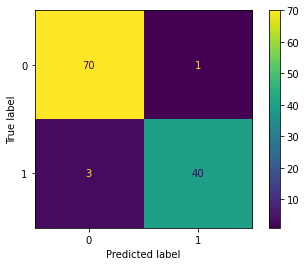

In [393]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Creating an model to test the Original data

In [394]:
model_rf_pca = RandomForestClassifier()

In [395]:
X_pca = df_cancer_pca.drop(['diagnosis'], axis=1).values
y_pca = df_cancer_pca['diagnosis'].values

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

In [397]:
model_rf_pca.fit(X_train, y_train)

y_pred = model_rf_pca.predict(X_test)

In [398]:

print(classification_report(y_test,y_pred))
print(f'{(accuracy_score(y_test, y_pred)) * 100:.2f}%')

              precision    recall  f1-score   support

           B       0.97      0.96      0.96        71
           M       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

95.61%


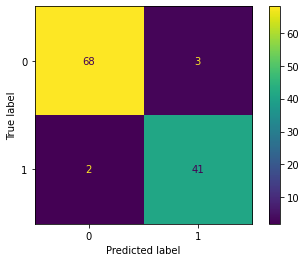

In [399]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()